In [63]:
import pandas as pd 

In [64]:
df=pd.read_csv('D:\College Project\job_trend_predictor\data_collection\jobs.csv')
df.head(2)

<>:1: SyntaxWarning: invalid escape sequence '\C'
<>:1: SyntaxWarning: invalid escape sequence '\C'
C:\Users\harsh\AppData\Local\Temp\ipykernel_2612\771331899.py:1: SyntaxWarning: invalid escape sequence '\C'
  df=pd.read_csv('D:\College Project\job_trend_predictor\data_collection\jobs.csv')


,Unnamed: 0,Job Id,Experience,Qualifications,Salary Range,location,Country,latitude,longitude,Work Type,...,Contact,Job Title,Role,Job Portal,Job Description,Benefits,skills,Responsibilities,Company,Company Profile
0,61,401560922349533,5 to 12 Years,PhD,$57K-$125K,New Delhi,India,20.5937,78.9629,Full-Time,...,635.430.4890,Account Executive,Sales Account Executive,Internships.com,A Sales Account Executive is responsible for a...,"{'Flexible Spending Accounts (FSAs), Relocatio...",Sales strategies and tactics Account managemen...,Identify and pursue sales opportunities with n...,GlaxoSmithKline,"{""Sector"":""Pharmaceuticals"",""Industry"":""Pharma..."
1,145,2122997813566133,0 to 14 Years,BBA,$55K-$95K,New Delhi,India,20.5937,78.9629,Contract,...,001-231-466-9867x086,Customer Service Representative,Call Center Agent,Jobs2Careers,A Call Center Agent handles incoming and outgo...,"{'Childcare Assistance, Paid Time Off (PTO), R...",Customer service Call center operations Proble...,Handle incoming phone calls and provide inform...,Textron,"{""Sector"":""Aerospace & Defense"",""Industry"":""Ae..."


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7449 entries, 0 to 7448
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        7449 non-null   int64  
 1   Job Id            7449 non-null   int64  
 2   Experience        7449 non-null   object 
 3   Qualifications    7449 non-null   object 
 4   Salary Range      7449 non-null   object 
 5   location          7449 non-null   object 
 6   Country           7449 non-null   object 
 7   latitude          7449 non-null   float64
 8   longitude         7449 non-null   float64
 9   Work Type         7449 non-null   object 
 10  Company Size      7449 non-null   int64  
 11  Job Posting Date  7449 non-null   object 
 12  Preference        7449 non-null   object 
 13  Contact Person    7449 non-null   object 
 14  Contact           7449 non-null   object 
 15  Job Title         7449 non-null   object 
 16  Role              7449 non-null   object 


In [66]:
# Check missing values
print("Missing values:\n", df.isnull().sum())

Missing values:
 Unnamed: 0           0
Job Id               0
Experience           0
Qualifications       0
Salary Range         0
location             0
Country              0
latitude             0
longitude            0
Work Type            0
Company Size         0
Job Posting Date     0
Preference           0
Contact Person       0
Contact              0
Job Title            0
Role                 0
Job Portal           0
Job Description      0
Benefits             0
skills               0
Responsibilities     0
Company              0
Company Profile     23
dtype: int64


In [67]:
df.dropna(inplace=True)

In [68]:
df.dtypes

Unnamed: 0            int64
Job Id                int64
Experience           object
Qualifications       object
Salary Range         object
location             object
Country              object
latitude            float64
longitude           float64
Work Type            object
Company Size          int64
Job Posting Date     object
Preference           object
Contact Person       object
Contact              object
Job Title            object
Role                 object
Job Portal           object
Job Description      object
Benefits             object
skills               object
Responsibilities     object
Company              object
Company Profile      object
dtype: object

In [69]:


# Clean salary range (extract min and max salary)
def extract_salary(salary_range):
    salary_range = str(salary_range)
    nums = [int(''.join(filter(str.isdigit, x))) for x in salary_range.split('-')]
    return pd.Series({'min_salary': (nums[0]*83*1000)/2, 'max_salary': (nums[1]*83*1000)/2})

df[['min_salary', 'max_salary']] = df['Salary Range'].apply(extract_salary)

# Convert experience range to numeric
def extract_experience(exp_range):
    exp_range = str(exp_range)
    nums = [int(''.join(filter(str.isdigit, x))) for x in exp_range.split('to')]
    return pd.Series({'min_experience': nums[0], 'max_experience': nums[1]})

df[['min_experience', 'max_experience']] = df['Experience'].apply(extract_experience)

In [71]:
df.head(1)

,Unnamed: 0,Job Id,Experience,Qualifications,Salary Range,location,Country,latitude,longitude,Work Type,...,Job Description,Benefits,skills,Responsibilities,Company,Company Profile,min_salary,max_salary,min_experience,max_experience
0,61,401560922349533,5 to 12 Years,PhD,$57K-$125K,New Delhi,India,20.5937,78.9629,Full-Time,...,A Sales Account Executive is responsible for a...,"{'Flexible Spending Accounts (FSAs), Relocatio...",Sales strategies and tactics Account managemen...,Identify and pursue sales opportunities with n...,GlaxoSmithKline,"{""Sector"":""Pharmaceuticals"",""Industry"":""Pharma...",2365500.0,5187500.0,5,12


In [72]:
df.columns

Index(['Unnamed: 0', 'Job Id', 'Experience', 'Qualifications', 'Salary Range',
       'location', 'Country', 'latitude', 'longitude', 'Work Type',
       'Company Size', 'Job Posting Date', 'Preference', 'Contact Person',
       'Contact', 'Job Title', 'Role', 'Job Portal', 'Job Description',
       'Benefits', 'skills', 'Responsibilities', 'Company', 'Company Profile',
       'min_salary', 'max_salary', 'min_experience', 'max_experience'],
      dtype='object')

In [73]:
df['min_salary'].describe()

count    7.426000e+03
mean     2.489346e+06
std      1.312762e+05
min      2.282500e+06
25%      2.365500e+06
50%      2.490000e+06
75%      2.614500e+06
max      2.697500e+06
Name: min_salary, dtype: float64

In [74]:
# Clean text columns
text_columns = ['Job Title', 'Role', 'Job Description', 'Company']
for col in text_columns:
    # Convert to lowercase
    df[col] = df[col].str.lower()
    # Remove special characters
    df[col] = df[col].str.replace('[^\w\s]', '', regex=True)
    # Remove extra whitespace
    df[col] = df[col].str.strip()

<>:7: SyntaxWarning: invalid escape sequence '\w'
<>:7: SyntaxWarning: invalid escape sequence '\w'
C:\Users\harsh\AppData\Local\Temp\ipykernel_2612\991771370.py:7: SyntaxWarning: invalid escape sequence '\w'
  df[col] = df[col].str.replace('[^\w\s]', '', regex=True)


In [75]:
# Convert categorical variables to numeric using label encoding
from sklearn.preprocessing import LabelEncoder

categorical_cols = ['Work Type', 'Preference', 'Qualifications']
le = LabelEncoder()

for col in categorical_cols:
    df[f'{col}_encoded'] = le.fit_transform(df[col])

In [76]:
df.columns

Index(['Unnamed: 0', 'Job Id', 'Experience', 'Qualifications', 'Salary Range',
       'location', 'Country', 'latitude', 'longitude', 'Work Type',
       'Company Size', 'Job Posting Date', 'Preference', 'Contact Person',
       'Contact', 'Job Title', 'Role', 'Job Portal', 'Job Description',
       'Benefits', 'skills', 'Responsibilities', 'Company', 'Company Profile',
       'min_salary', 'max_salary', 'min_experience', 'max_experience',
       'Work Type_encoded', 'Preference_encoded', 'Qualifications_encoded'],
      dtype='object')

In [77]:
df1=df.copy()

In [131]:
df.columns

Index(['Unnamed: 0', 'Job Id', 'Experience', 'Qualifications', 'Salary Range',
       'location', 'Country', 'latitude', 'longitude', 'Work Type',
       'Company Size', 'Job Posting Date', 'Preference', 'Contact Person',
       'Contact', 'Job Title', 'Role', 'Job Portal', 'Job Description',
       'Benefits', 'skills', 'Responsibilities', 'Company', 'Company Profile',
       'min_salary', 'max_salary', 'min_experience', 'max_experience',
       'Work Type_encoded', 'Preference_encoded', 'Qualifications_encoded'],
      dtype='object')

In [132]:
# Calculate average salary
df['avg_salary'] = (df['min_salary'] + df['max_salary']) / 2

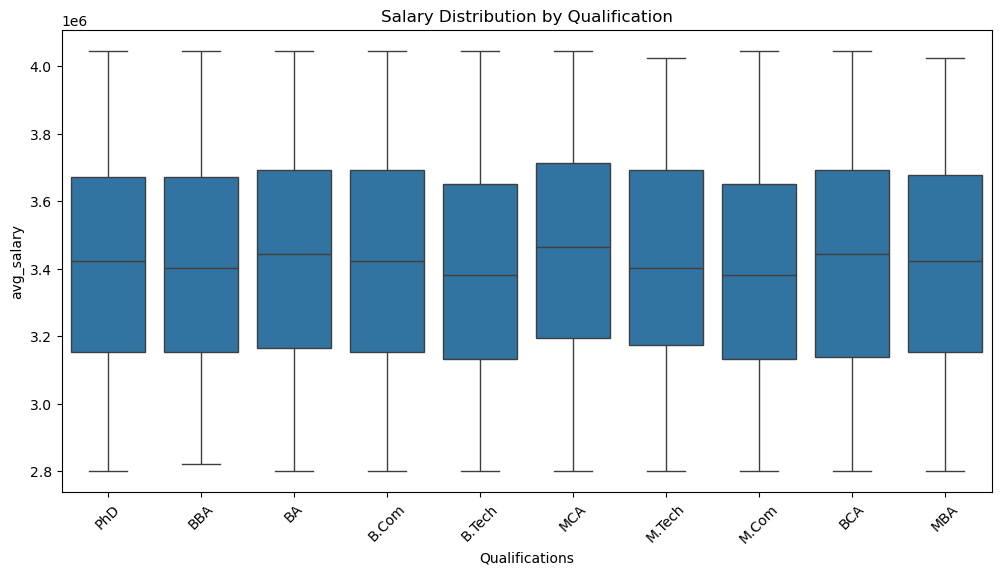

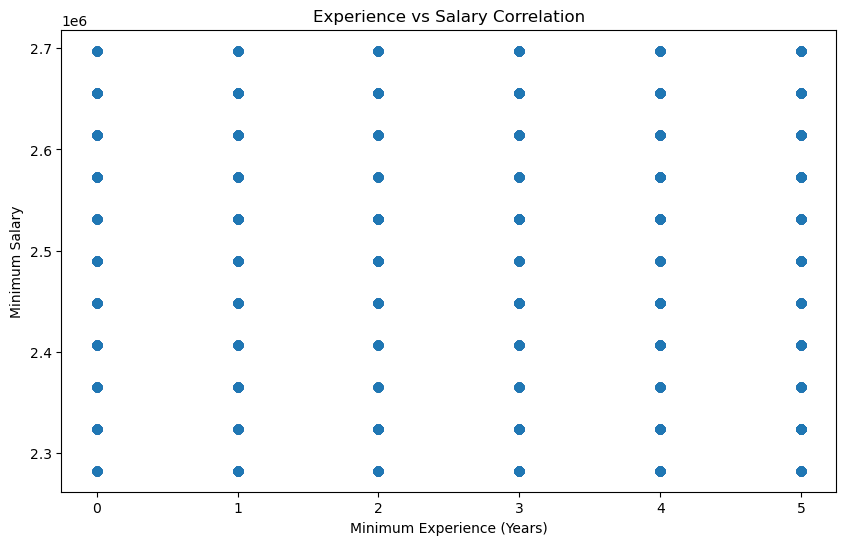

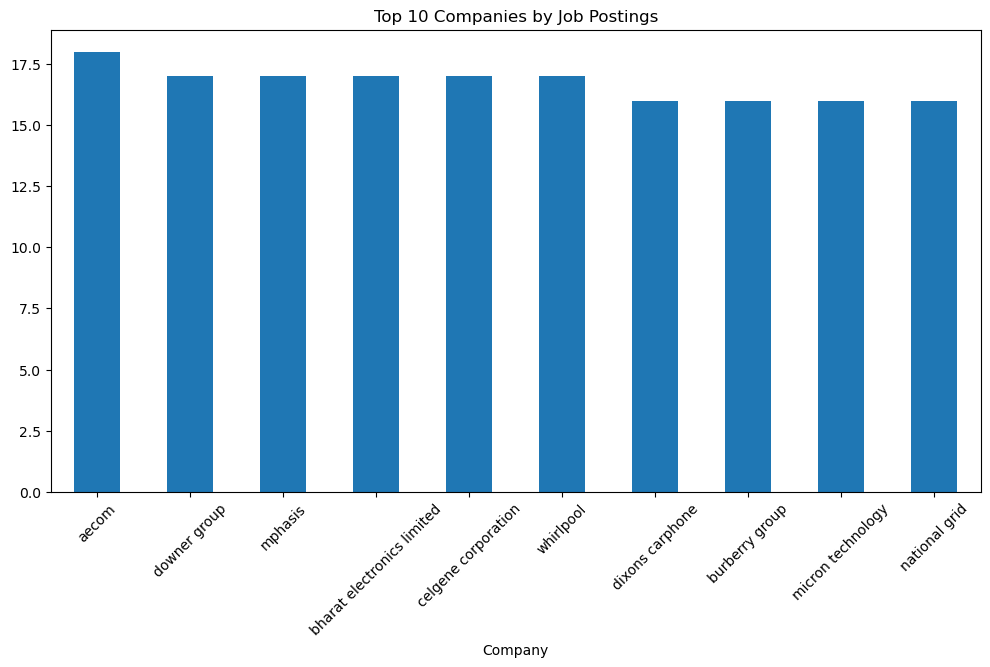

In [133]:
import matplotlib.pyplot as plt
import seaborn as sns

# Salary distribution by qualification
plt.figure(figsize=(12, 6))
sns.boxplot(x='Qualifications', y='avg_salary', data=df)
plt.xticks(rotation=45)
plt.title('Salary Distribution by Qualification')
plt.show()

# Experience vs Salary correlation
plt.figure(figsize=(10, 6))
plt.scatter(df['min_experience'], df['min_salary'])
plt.xlabel('Minimum Experience (Years)')
plt.ylabel('Minimum Salary')
plt.title('Experience vs Salary Correlation')
plt.show()

# Top companies by job postings
plt.figure(figsize=(12, 6))
df['Company'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Companies by Job Postings')
plt.xticks(rotation=45)
plt.show()

In [134]:
df.columns

Index(['Unnamed: 0', 'Job Id', 'Experience', 'Qualifications', 'Salary Range',
       'location', 'Country', 'latitude', 'longitude', 'Work Type',
       'Company Size', 'Job Posting Date', 'Preference', 'Contact Person',
       'Contact', 'Job Title', 'Role', 'Job Portal', 'Job Description',
       'Benefits', 'skills', 'Responsibilities', 'Company', 'Company Profile',
       'min_salary', 'max_salary', 'min_experience', 'max_experience',
       'Work Type_encoded', 'Preference_encoded', 'Qualifications_encoded',
       'avg_salary'],
      dtype='object')

In [135]:
import re
import pandas as pd

# -------------------------
# Common fixes for broken tokens
# -------------------------
FIX_PATTERNS = [
    (r'\bH\s*,\s*T\s*,\s*M\s*,\s*L\b', 'HTML'),
    (r'\bC\s*,\s*S\s*,\s*S\b', 'CSS'),
    (r'\bJava\s*,?\s*Script\b', 'JavaScript'),
    (r'\bNode\s*,?\s*\.?\s*js\b', 'Node.js'),
    (r'\bReact\s*,?\s*\.?\s*js\b', 'React.js'),
]

JOIN_MAP = {
    ('Java', 'Script'): 'JavaScript',
    ('Node', '.js'): 'Node.js',
    ('React', '.js'): 'React.js',
}

# -------------------------
# Function to split skills
# -------------------------
def split_skills_by_capitals(raw):
    if raw is None:
        return []
    s = str(raw).strip()

    # Remove outer brackets [ ] if present
    s = re.sub(r'^\[+|\]+$', '', s).strip()

    # Remove content inside any type of brackets (round, square, curly)
    s = re.sub(r'\([^)]*\)', '', s)
    s = re.sub(r'\[[^\]]*\]', '', s)
    s = re.sub(r'\{[^}]*\}', '', s)

    # Apply known fixes for broken tokens
    for pat, repl in FIX_PATTERNS:
        s = re.sub(pat, repl, s, flags=re.IGNORECASE)

    # Normalize separators
    s = re.sub(r'[,\;/\|]+', ' ', s)

    # Remove ' and ' / ' or ' (case-insensitive)
    s = re.sub(r'\b(and|or)\b', ' ', s, flags=re.IGNORECASE)

    # Collapse extra spaces
    s = re.sub(r'\s+', ' ', s).strip()

    if not s:
        return []

    # Detect capital-start tokens
    starts = []
    for i, ch in enumerate(s):
        if ch.isupper() and (i == 0 or s[i-1].isspace()):
            starts.append(i)

    if not starts:
        return [s]

    spans = []
    for idx, st in enumerate(starts):
        end = starts[idx+1] if idx+1 < len(starts) else len(s)
        skill = s[st:end].strip().strip(' .;:,')
        if skill:
            spans.append(skill)

    # Merge known token pairs
    final = []
    i = 0
    while i < len(spans):
        tok = spans[i]
        if i + 1 < len(spans):
            pair = (re.sub(r'\W+', '', tok).title(), re.sub(r'\W+', '', spans[i+1]).title())
            if pair in JOIN_MAP:
                final.append(JOIN_MAP[pair])
                i += 2
                continue
        final.append(tok)
        i += 1

    # Deduplicate while preserving order
    seen = set()
    unique = []
    for item in final:
        key = item.lower()
        if key not in seen:
            seen.add(key)
            unique.append(item)

    return unique


# -------------------------
# Example usage
# -------------------------
df['sepp_skills'] = df['skills'].apply(split_skills_by_capitals)


In [136]:
df.columns

Index(['Unnamed: 0', 'Job Id', 'Experience', 'Qualifications', 'Salary Range',
       'location', 'Country', 'latitude', 'longitude', 'Work Type',
       'Company Size', 'Job Posting Date', 'Preference', 'Contact Person',
       'Contact', 'Job Title', 'Role', 'Job Portal', 'Job Description',
       'Benefits', 'skills', 'Responsibilities', 'Company', 'Company Profile',
       'min_salary', 'max_salary', 'min_experience', 'max_experience',
       'Work Type_encoded', 'Preference_encoded', 'Qualifications_encoded',
       'avg_salary', 'sepp_skills'],
      dtype='object')

In [137]:
df.drop(columns=['Unnamed: 0', 'latitude', 'longitude','Company Size'], inplace=True)

In [138]:
df.head(2)

,Job Id,Experience,Qualifications,Salary Range,location,Country,Work Type,Job Posting Date,Preference,Contact Person,...,Company Profile,min_salary,max_salary,min_experience,max_experience,Work Type_encoded,Preference_encoded,Qualifications_encoded,avg_salary,sepp_skills
0,401560922349533,5 to 12 Years,PhD,$57K-$125K,New Delhi,India,Full-Time,2022-09-28,Female,Samantha Ramirez,...,"{""Sector"":""Pharmaceuticals"",""Industry"":""Pharma...",2365500.0,5187500.0,5,12,1,1,9,3776500.0,"[Sales strategies tactics, Account management,..."
1,2122997813566133,0 to 14 Years,BBA,$55K-$95K,New Delhi,India,Contract,2022-07-17,Female,Michael Harris,...,"{""Sector"":""Aerospace & Defense"",""Industry"":""Ae...",2282500.0,3942500.0,0,14,0,1,3,3112500.0,"[Customer service, Call center operations, Pro..."


In [139]:
df.columns

Index(['Job Id', 'Experience', 'Qualifications', 'Salary Range', 'location',
       'Country', 'Work Type', 'Job Posting Date', 'Preference',
       'Contact Person', 'Contact', 'Job Title', 'Role', 'Job Portal',
       'Job Description', 'Benefits', 'skills', 'Responsibilities', 'Company',
       'Company Profile', 'min_salary', 'max_salary', 'min_experience',
       'max_experience', 'Work Type_encoded', 'Preference_encoded',
       'Qualifications_encoded', 'avg_salary', 'sepp_skills'],
      dtype='object')

In [140]:
df['Job Portal'].value_counts()

Job Portal
Jobs2Careers           653
Snagajob               605
Stack Overflow Jobs    601
Idealist               596
FlexJobs               596
USAJOBS                589
Internships.com        568
The Muse               568
SimplyHired            556
Dice                   328
ZipRecruiter           315
LinkedIn               299
CareerBuilder          292
Monster                290
Glassdoor              286
Indeed                 284
Name: count, dtype: int64

In [141]:
df2=df.copy()

In [142]:
# Function to clean and standardize job titles and roles
def clean_job_titles(text):
    # Convert to string in case of any non-string values
    text = str(text)
    
    # Common replacements for job titles
    replacements = {
        'sr': 'senior',
        'jr': 'junior',
        'dev': 'developer',
        'engg': 'engineer',
        'eng': 'engineer',
        'mgr': 'manager',
        'sde': 'software development engineer',
        'tech': 'technology',
        'proj': 'project',
        'prog': 'programmer',
        'sw': 'software'
    }
    
    # Apply replacements
    for old, new in replacements.items():
        # Use word boundaries to avoid partial word replacements
        text = re.sub(rf'\b{old}\b', new, text)
    
    # Remove duplicate words
    words = text.split()
    text = ' '.join(dict.fromkeys(words))
    
    return text.strip()

# Apply cleaning to both Job Title and Role columns
df['Job Title'] = df['Job Title'].apply(clean_job_titles)
df['Role'] = df['Role'].apply(clean_job_titles)


In [143]:
df.head(2)

,Job Id,Experience,Qualifications,Salary Range,location,Country,Work Type,Job Posting Date,Preference,Contact Person,...,Company Profile,min_salary,max_salary,min_experience,max_experience,Work Type_encoded,Preference_encoded,Qualifications_encoded,avg_salary,sepp_skills
0,401560922349533,5 to 12 Years,PhD,$57K-$125K,New Delhi,India,Full-Time,2022-09-28,Female,Samantha Ramirez,...,"{""Sector"":""Pharmaceuticals"",""Industry"":""Pharma...",2365500.0,5187500.0,5,12,1,1,9,3776500.0,"[Sales strategies tactics, Account management,..."
1,2122997813566133,0 to 14 Years,BBA,$55K-$95K,New Delhi,India,Contract,2022-07-17,Female,Michael Harris,...,"{""Sector"":""Aerospace & Defense"",""Industry"":""Ae...",2282500.0,3942500.0,0,14,0,1,3,3112500.0,"[Customer service, Call center operations, Pro..."


In [144]:
# 1. Create skill count features
df['skill_count'] = df['sepp_skills'].apply(len)

# 2. Create salary features
df['salary_range'] = df['max_salary'] - df['min_salary']
df['experience_range'] = df['max_experience'] - df['min_experience']
df['salary_per_year_experience'] = df['avg_salary'] / (df['min_experience'] + 1)  # Adding 1 to avoid division by zero

# 3. Create binary features for common job requirements
df['is_remote'] = df['Work Type'].str.contains('remote', case=False).astype(int)
df['is_fulltime'] = df['Work Type'].str.contains('full.?time|full', case=False).astype(int)

# 4. Create experience level categories
def get_experience_level(min_exp):
    if min_exp < 2:
        return 'Entry'
    elif min_exp < 5:
        return 'Mid'
    else:
        return 'Senior'

df['experience_level'] = df['min_experience'].apply(get_experience_level)

# 5. Create salary bands
df['salary_band'] = pd.qcut(df['avg_salary'], q=5, labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])

# 6. Extract key skills (example for common tech skills)
common_skills = ['python', 'java', 'javascript', 'sql', 'aws', 'react']
for skill in common_skills:
    df[f'has_{skill}'] = df['sepp_skills'].apply(lambda x: 1 if any(skill in s.lower() for s in x) else 0)

# 7. Create company name length (might indicate company size/establishment)
df['company_name_length'] = df['Company'].str.len()

# 8. Create features from job description
df['description_length'] = df['Job Description'].str.len()

# 9. Encode categorical variables that weren't encoded yet
categorical_cols = ['experience_level', 'Work Type', 'Job Portal']
for col in categorical_cols:
    df[f'{col}_encoded'] = pd.factorize(df[col])[0]

# 10. Create day of week and month features from posting date (if available)
if 'posting_date' in df.columns:
    df['posting_date'] = pd.to_datetime(df['posting_date'])
    df['post_day'] = df['posting_date'].dt.day
    df['post_month'] = df['posting_date'].dt.month
    df['post_dayofweek'] = df['posting_date'].dt.dayofweek

# 11. Group similar job titles
def simplify_job_title(title):
    if 'data' in title.lower() and 'scien' in title.lower():
        return 'data_scientist'
    elif 'data' in title.lower() and 'analy' in title.lower():
        return 'data_analyst'
    elif 'software' in title.lower() and 'engineer' in title.lower():
        return 'software_engineer'
    elif 'full' in title.lower() and 'stack' in title.lower():
        return 'fullstack_developer'
    else:
        return title.lower().replace(' ', '_')

df['simplified_job_title'] = df['Job Title'].apply(simplify_job_title)

# Display the new features
print("New features added:", [col for col in df.columns if col not in df1.columns])
df.head(2)

New features added: ['avg_salary', 'sepp_skills', 'skill_count', 'salary_range', 'experience_range', 'salary_per_year_experience', 'is_remote', 'is_fulltime', 'experience_level', 'salary_band', 'has_python', 'has_java', 'has_javascript', 'has_sql', 'has_aws', 'has_react', 'company_name_length', 'description_length', 'experience_level_encoded', 'Job Portal_encoded', 'simplified_job_title']


,Job Id,Experience,Qualifications,Salary Range,location,Country,Work Type,Job Posting Date,Preference,Contact Person,...,has_java,has_javascript,has_sql,has_aws,has_react,company_name_length,description_length,experience_level_encoded,Job Portal_encoded,simplified_job_title
0,401560922349533,5 to 12 Years,PhD,$57K-$125K,New Delhi,India,Full-Time,2022-09-28,Female,Samantha Ramirez,...,0,0,0,0,0,15,164,0,0,account_executive
1,2122997813566133,0 to 14 Years,BBA,$55K-$95K,New Delhi,India,Contract,2022-07-17,Female,Michael Harris,...,0,0,0,0,0,7,161,1,1,customer_service_representative


In [156]:
df.columns

Index(['Job Id', 'Experience', 'Qualifications', 'Salary Range', 'location',
       'Country', 'Work Type', 'Job Posting Date', 'Preference',
       'Contact Person', 'Contact', 'Job Title', 'Role', 'Job Portal',
       'Job Description', 'Benefits', 'skills', 'Responsibilities', 'Company',
       'Company Profile', 'min_salary', 'max_salary', 'min_experience',
       'max_experience', 'Work Type_encoded', 'Preference_encoded',
       'Qualifications_encoded', 'avg_salary', 'sepp_skills', 'skill_count',
       'salary_range', 'experience_range', 'salary_per_year_experience',
       'is_remote', 'is_fulltime', 'experience_level', 'salary_band',
       'has_python', 'has_java', 'has_javascript', 'has_sql', 'has_aws',
       'has_react', 'company_name_length', 'description_length',
       'experience_level_encoded', 'Job Portal_encoded',
       'simplified_job_title'],
      dtype='object')

In [157]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import classification_report, mean_squared_error, r2_score

# For Classification Model (Predicting Job Role)
def prepare_classification_data(df):
    # Features for classification
    X_class = df[[
        'min_experience',
        'Qualifications_encoded',
        'Preference_encoded',
        'has_python', 'has_java', 'has_javascript',
        'has_sql', 'has_aws', 'has_react'
    ]]
    
    # Target for classification (Job Role)
    le_role = LabelEncoder()
    y_class = le_role.fit_transform(df['Role'])
    
    return X_class, y_class, le_role

# For Regression Model (Predicting Salary)
def prepare_regression_data(df):
    # Features for regression
    X_reg = df[[
        'min_experience',
        'is_remote',
        'is_fulltime',
        'Qualifications_encoded',
        'has_python', 'has_java', 'has_javascript',
        'has_sql', 'has_aws', 'has_react'
    ]]
    
    # Target for regression (Average Salary)
    y_reg = df['avg_salary']
    
    return X_reg, y_reg

In [158]:
# Building Classification Model
X_class, y_class, le_role = prepare_classification_data(df)
X_class_train, X_class_test, y_class_train, y_class_test = train_test_split(
    X_class, y_class, test_size=0.2, random_state=42
)

# Scale the features
scaler_class = StandardScaler()
X_class_train_scaled = scaler_class.fit_transform(X_class_train)
X_class_test_scaled = scaler_class.transform(X_class_test)

# Train Classification Model
clf_model = RandomForestClassifier(n_estimators=100, random_state=42)
clf_model.fit(X_class_train_scaled, y_class_train)

# Building Regression Model
X_reg, y_reg = prepare_regression_data(df)
X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42
)

# Scale the features
scaler_reg = StandardScaler()
X_reg_train_scaled = scaler_reg.fit_transform(X_reg_train)
X_reg_test_scaled = scaler_reg.transform(X_reg_test)

# Train Regression Model
reg_model = RandomForestRegressor(n_estimators=100, random_state=42)
reg_model.fit(X_reg_train_scaled, y_reg_train)

RandomForestRegressor(random_state=42)

In [159]:
# Function to predict job role
def predict_job_role(features_dict):
    # Convert input features to DataFrame
    input_features = pd.DataFrame([features_dict])
    
    # Prepare input features
    required_features = [
        'min_experience',
        'Qualifications_encoded',
        'Preference_encoded',
        'has_python', 'has_java', 'has_javascript',
        'has_sql', 'has_aws', 'has_react'
    ]
    
    # Scale features
    input_scaled = scaler_class.transform(input_features[required_features])
    
    # Make prediction
    prediction = clf_model.predict(input_scaled)
    
    # Convert prediction back to job title
    predicted_role = le_role.inverse_transform(prediction)[0]
    
    return predicted_role

# Function to predict salary
def predict_salary(features_dict):
    # Convert input features to DataFrame
    input_features = pd.DataFrame([features_dict])
    
    # Prepare input features
    required_features = [
        'min_experience',
        'is_remote',
        'is_fulltime',
        'Qualifications_encoded',
        'has_python', 'has_java', 'has_javascript',
        'has_sql', 'has_aws', 'has_react'
    ]
    
    # Scale features
    input_scaled = scaler_reg.transform(input_features[required_features])
    
    # Make prediction
    predicted_salary = reg_model.predict(input_scaled)[0]
    
    return predicted_salary

In [154]:
# Evaluate Classification Model
y_class_pred = clf_model.predict(X_class_test_scaled)
print("Classification Model Performance:")
print(classification_report(y_class_test, y_class_pred))

# Evaluate Regression Model
y_reg_pred = reg_model.predict(X_reg_test_scaled)
print("\nRegression Model Performance:")
print(f"R2 Score: {r2_score(y_reg_test, y_reg_pred):.3f}")
print(f"Root Mean Squared Error: {mean_squared_error(y_reg_test, y_reg_pred, squared=False):.2f}")

Classification Model Performance:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.00      0.00      0.00        15
           2       0.04      0.07      0.05        15
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00        18
           5       0.00      0.00      0.00        10
           6       0.00      0.00      0.00         6
           7       0.00      0.00      0.00         9
           8       0.00      0.00      0.00        16
           9       0.00      0.00      0.00        11
          10       0.00      0.00      0.00         8
          11       0.00      0.00      0.00        12
          12       0.00      0.00      0.00        14
          13       0.00      0.00      0.00         5
          14       0.00      0.00      0.00        13
          15       0.00      0.00      0.00        12
          16       0.00      0.00      0.00    

c:\Users\harsh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\harsh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\harsh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\harsh\anaconda3\Lib\site-packag

In [163]:
# Example prediction
sample_input = {
    
    'min_experience': 1,
    'Qualifications_encoded': 2,  # Assuming this corresponds to 'B.Tech'
    'Preference_encoded': 1,      # Assuming this corresponds to some preference
    'has_python': 1,
    'has_java': 0,
    'has_javascript': 0,
    'has_sql': 1,
    'has_aws': 1,
    'has_react': 0,
    'is_remote': 0,
    'is_fulltime': 1
}

predicted_role = predict_job_role(sample_input)
predicted_salary = predict_salary(sample_input)

print(f"Predicted Job Role: {predicted_role}")
print(f"Predicted Salary: ₹{predicted_salary:,.2f}")

Predicted Job Role: database developer
Predicted Salary: ₹3,688,435.99
